In [1]:
# 导入模块
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import math
import matplotlib.pyplot as plt
import random
import time

In [2]:
# 取经纬度的近似值

def appro(x):
    return round(x, 2)

In [3]:
# 处理weather数据集
def weather_process(dataframe):
    dataframe = dataframe.drop('CodeSum', axis=1)
    dataframe = dataframe.drop('StnPressure', axis=1)
    dataframe = dataframe.drop('SeaLevel', axis=1)
    dataframe = dataframe.drop('PrecipTotal', axis=1)
    dataframe = dataframe.drop('Water1', axis=1)
    dataframe = dataframe.drop('Depth', axis=1)
    weather_stn1 = dataframe[dataframe['Station'] == 1]
    weather_stn2 = dataframe[dataframe['Station'] == 2]
    weather_stn1 = weather_stn1.drop('Station', axis=1)
    weather_stn2 = weather_stn2.drop('Station', axis=1)
    dataframe = weather_stn1.merge(weather_stn2, on='Date')
    dataframe = dataframe.replace('-', -1)
    dataframe = dataframe.replace('M', -1)
    dataframe = dataframe.replace('  T', -1)
    return dataframe

In [4]:
# 处理train，test数据集
def train_process(dataframe):
    dataframe['Month'] = dataframe.Date.apply(create_month)
    dataframe['Day'] = dataframe.Date.apply(create_day)
    dataframe['Lat_appro'] = dataframe.Latitude.apply(appro)
    dataframe['Long_appro'] = dataframe.Longitude.apply(appro)
    dataframe = dataframe.drop(['Address', 'Block', 'Street'], axis=1)
    return dataframe

In [5]:
# 分割日期数据

def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

In [6]:
# 使用数据集
train0 = pd.read_csv('train.csv')
weather = pd.read_csv('weather.csv')
tot = train0.shape[0]
# DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。
# DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。

In [7]:
# 预处理数据，将标签编码，得到物种、位置以及陷阱对应的编码值

def encode_data(dataframe):
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train0['Species'].values))
    dataframe['Species'] = lbl.transform(dataframe['Species'].values)
    lbl.fit(list(train0['Trap'].values))
    dataframe['Trap'] = lbl.transform(dataframe['Trap'].values)
    lbl.fit(list(train0['AddressNumberAndStreet'].values))
    dataframe['AddressNumberAndStreet'] = lbl.transform(dataframe['AddressNumberAndStreet'].values)
    return dataframe

In [8]:
# 根据日期将天气数据与训练集测试集合并

def join_process(data, weather):
    data = data.merge(weather, on='Date')
    data = data.drop(['Date'], axis=1)
    return data

In [9]:
# 剔除坏数据，切片得到有效数据

def slice_data(dataframe):
    label = dataframe.WnvPresent.values
    train = dataframe.drop(['WnvPresent'], axis=1)
    return [train,label]

In [10]:
def drawRoc (fpr,tpr):
    plt.subplots(figsize=(7,5.5))
    plt.plot(fpr,tpr,color='darkorange', lw =2)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
def solve(sz,train0):
    shit2=float(0)
    shit3=float(0)
    for i in range (0,3,1):
        train0=shuffle(train0)
        train = train0[:sz].copy()
        test = train0[sz+1:].copy()
        train = slice_data(encode_data(join_process(train_process(train), weather_process(weather))))
        test = slice_data(encode_data(join_process(train_process(test), weather_process(weather))))
        # 训练随机森林模型

        e = time.time()
        clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=50)
        #add train[0] x_train, train[1] y_training

        fit = clf.fit(train[0], train[1])
        y_score = clf.fit(train[0], train[1]).predict_proba(test[0])
        #add
        s = time.time()
        print(clf.classes_)
        print('training time: '+str(s-e) + 's')
        fpr, tpr, thresholds = roc_curve(test[1],y_score[:,1])
        #AUC
        predictions = clf.predict_proba(test[0])[:,1]
        #test[0] xtest test[1] ytest
        shit2 = shit2 + roc_auc_score(test[1], predictions, multi_class='ovo')
        
        #准确率
        predictions = clf.predict(test[0])
        shit3 = shit3 + metrics.accuracy_score(test[1], predictions)
        
        drawRoc(fpr,tpr)
    
    shit2=shit2/3
    shit3=shit3/3
    return shit2,shit3

[0 1]
training time: 2.617280960083008s


No handles with labels found to put in legend.


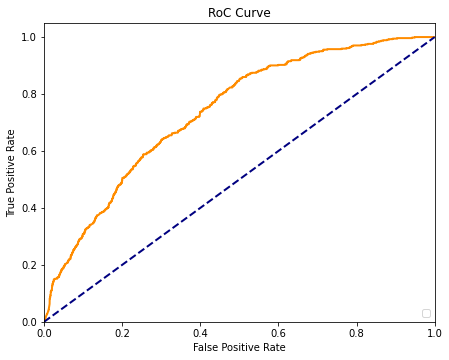

[0 1]
training time: 2.6020262241363525s


No handles with labels found to put in legend.


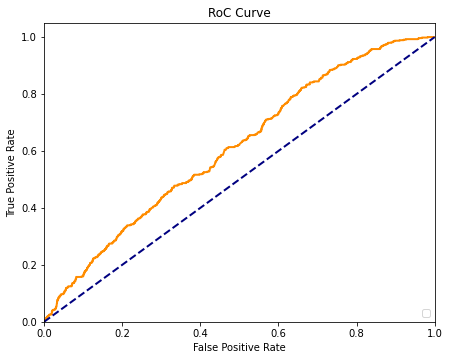

[0 1]
training time: 2.616642951965332s


No handles with labels found to put in legend.


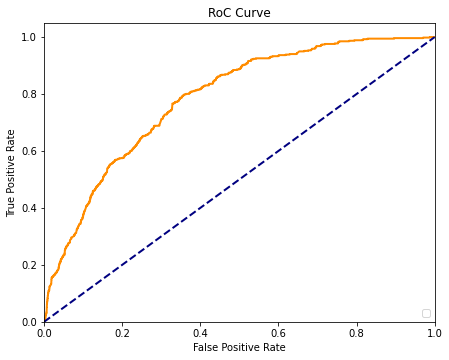

[0 1]
training time: 2.849320650100708s


No handles with labels found to put in legend.


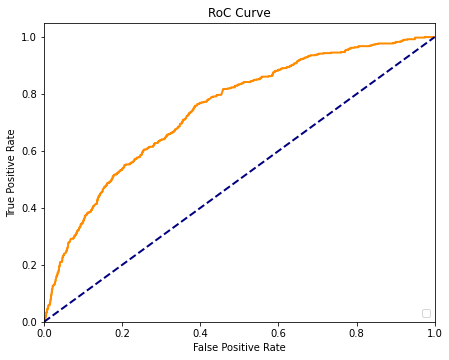

[0 1]
training time: 2.9208109378814697s


No handles with labels found to put in legend.


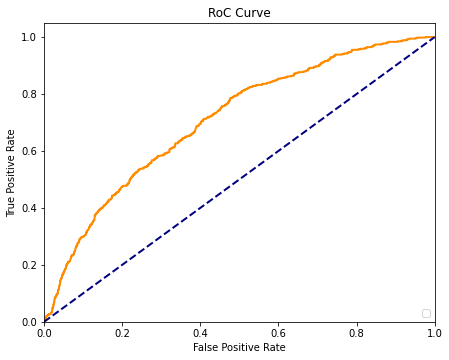

[0 1]
training time: 2.726949691772461s


No handles with labels found to put in legend.


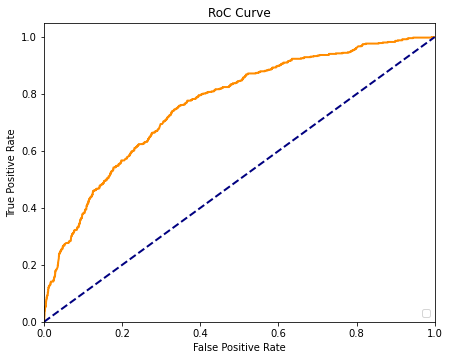

[0 1]
training time: 2.975071430206299s


No handles with labels found to put in legend.


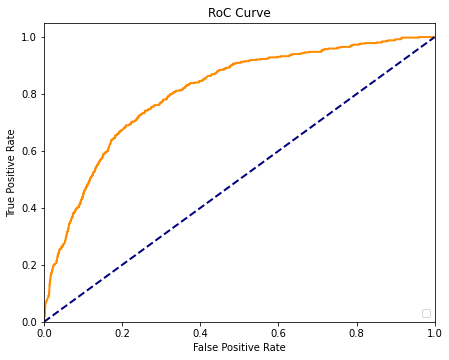

[0 1]
training time: 2.833949089050293s


No handles with labels found to put in legend.


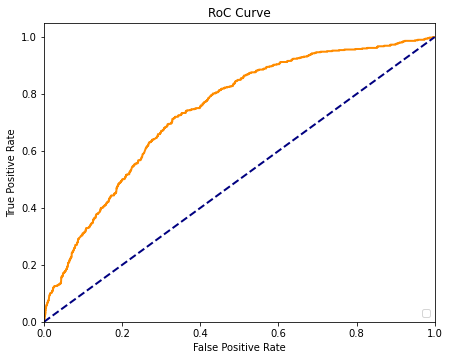

[0 1]
training time: 2.944767713546753s


No handles with labels found to put in legend.


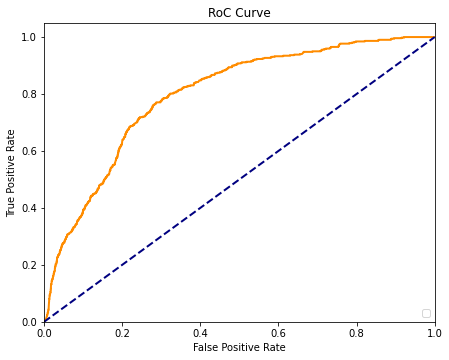

[0 1]
training time: 2.8440539836883545s


No handles with labels found to put in legend.


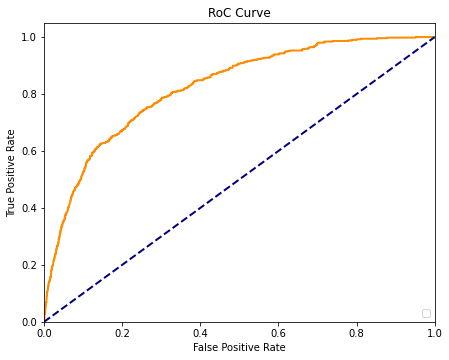

[0 1]
training time: 2.8523752689361572s


No handles with labels found to put in legend.


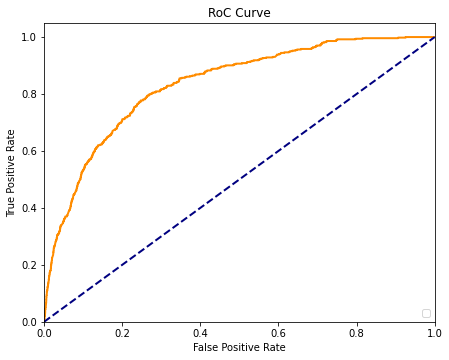

[0 1]
training time: 2.81890606880188s


No handles with labels found to put in legend.


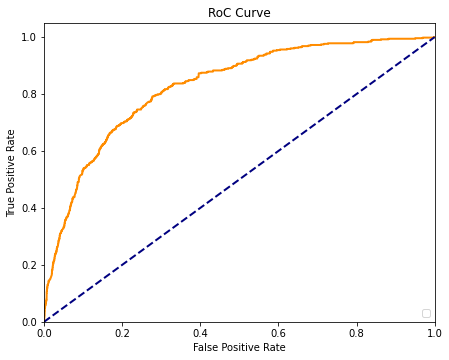

[0 1]
training time: 2.968499183654785s


No handles with labels found to put in legend.


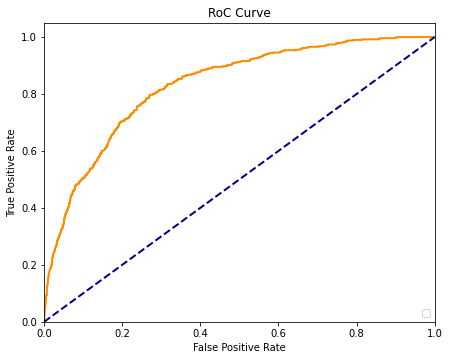

[0 1]
training time: 2.8231194019317627s


No handles with labels found to put in legend.


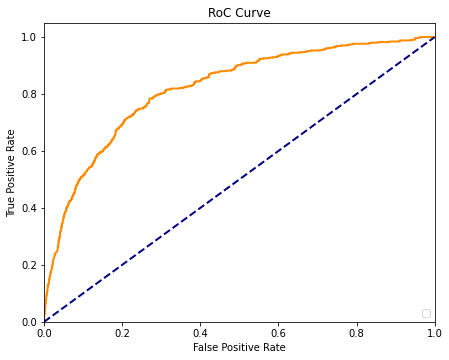

[0 1]
training time: 2.8377468585968018s


No handles with labels found to put in legend.


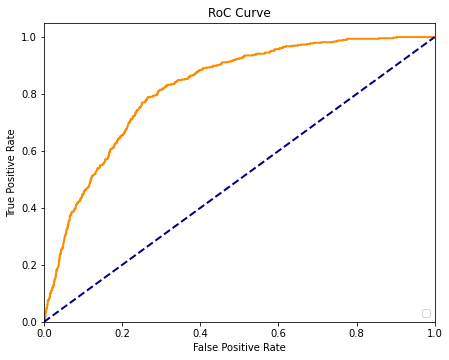

[0 1]
training time: 2.8284311294555664s


No handles with labels found to put in legend.


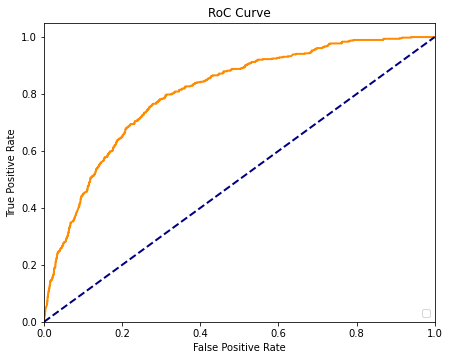

[0 1]
training time: 2.850162982940674s


No handles with labels found to put in legend.


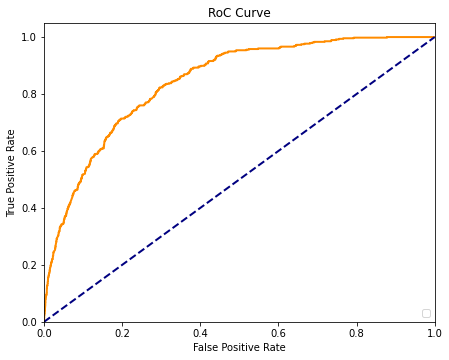

[0 1]
training time: 2.921316385269165s


No handles with labels found to put in legend.


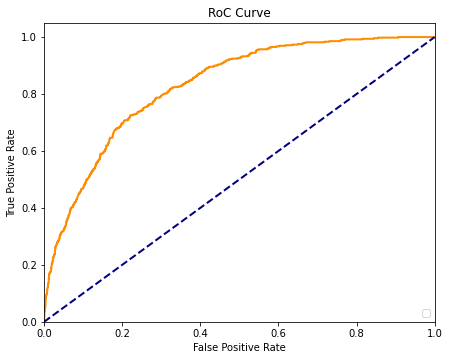

[0 1]
training time: 2.875370502471924s


No handles with labels found to put in legend.


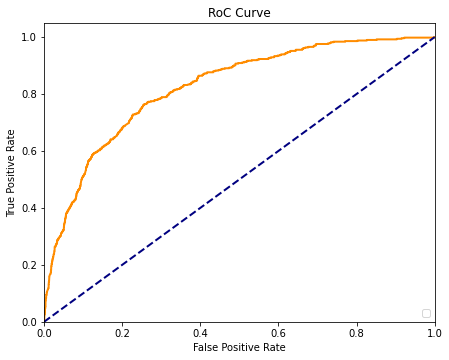

[0 1]
training time: 2.830939292907715s


No handles with labels found to put in legend.


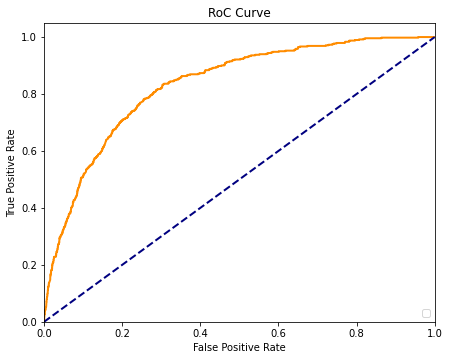

[0 1]
training time: 2.836184501647949s


No handles with labels found to put in legend.


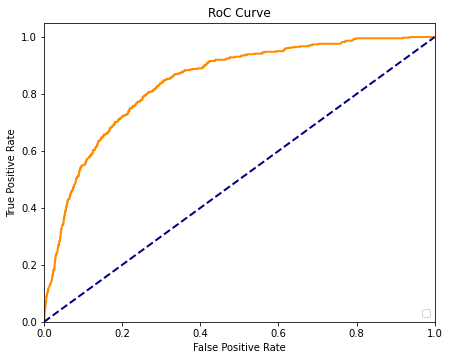

[0 1]
training time: 3.0505740642547607s


No handles with labels found to put in legend.


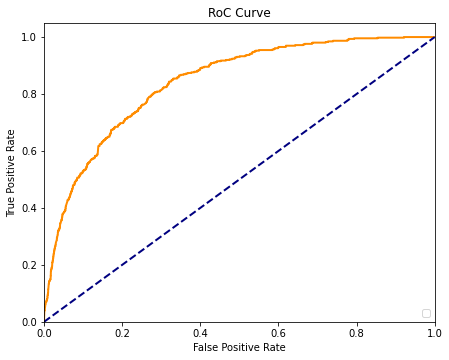

[0 1]
training time: 3.02953839302063s


No handles with labels found to put in legend.


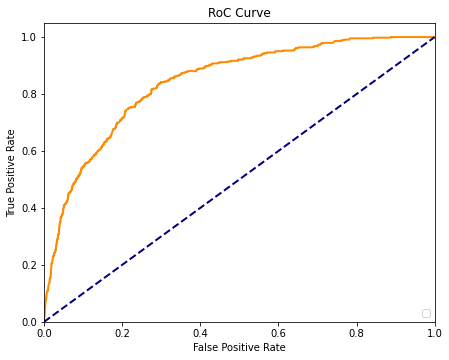

[0 1]
training time: 2.9471499919891357s


No handles with labels found to put in legend.


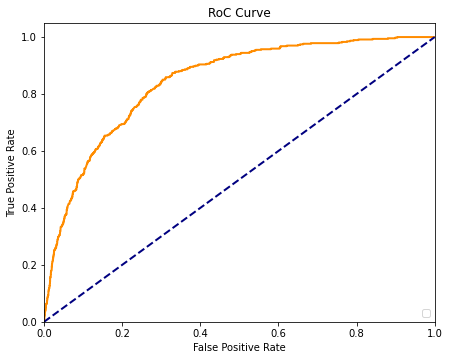

[0 1]
training time: 3.0900049209594727s


No handles with labels found to put in legend.


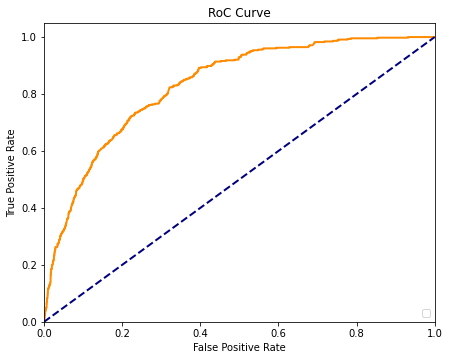

[0 1]
training time: 3.0430572032928467s


No handles with labels found to put in legend.


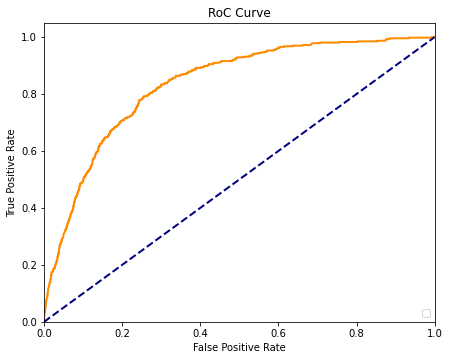

[0 1]
training time: 3.0643341541290283s


No handles with labels found to put in legend.


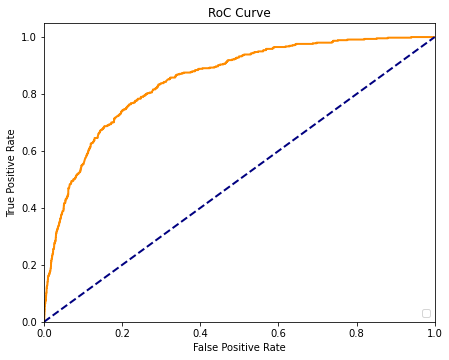

[0 1]
training time: 3.0582008361816406s


No handles with labels found to put in legend.


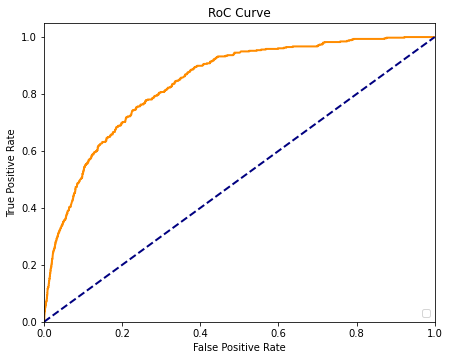

[0 1]
training time: 3.0632336139678955s


No handles with labels found to put in legend.


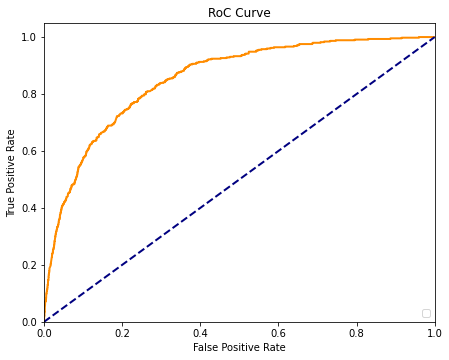

[0 1]
training time: 3.0730342864990234s


No handles with labels found to put in legend.


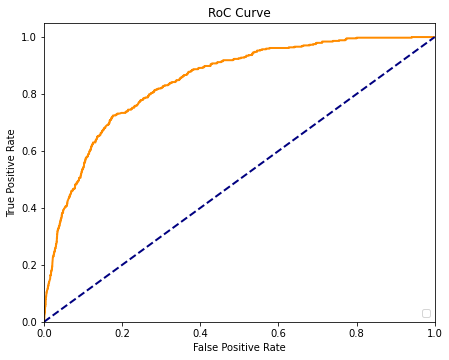

[0 1]
training time: 3.1090285778045654s


No handles with labels found to put in legend.


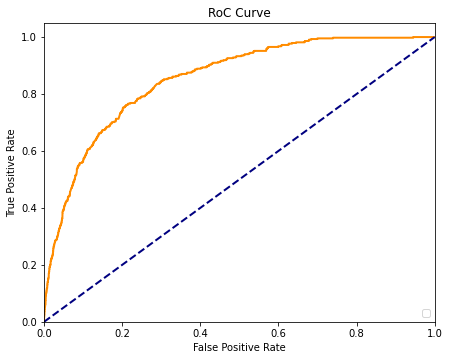

[0 1]
training time: 3.0320322513580322s


No handles with labels found to put in legend.


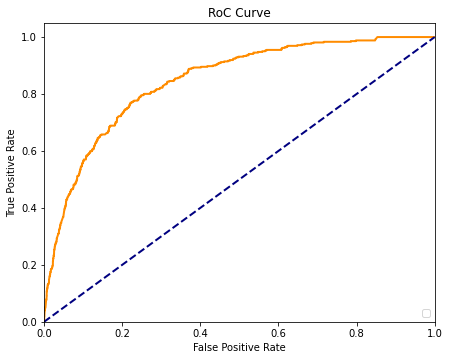

[0 1]
training time: 3.037210464477539s


No handles with labels found to put in legend.


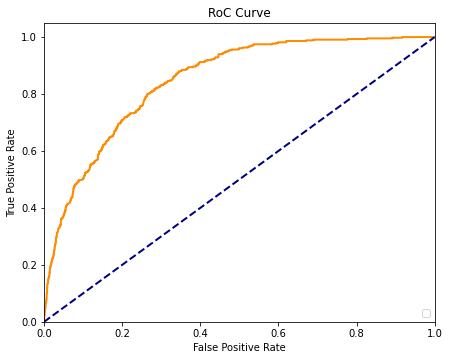

[0 1]
training time: 3.184290885925293s


No handles with labels found to put in legend.


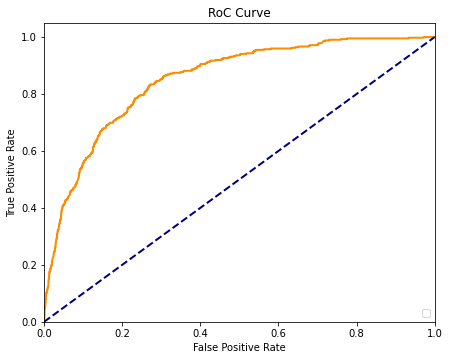

[0 1]
training time: 3.148017644882202s


No handles with labels found to put in legend.


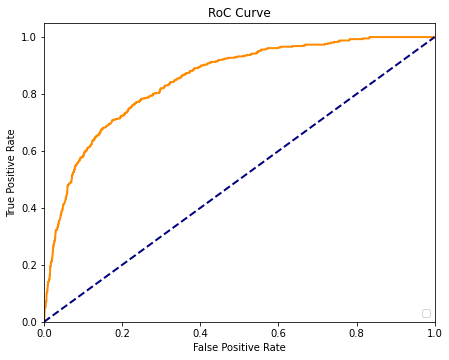

[0 1]
training time: 3.0654959678649902s


No handles with labels found to put in legend.


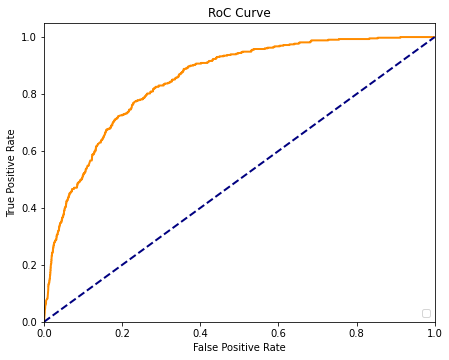

[0 1]
training time: 3.0941050052642822s


No handles with labels found to put in legend.


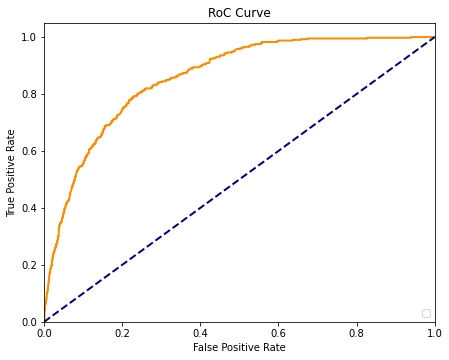

[0 1]
training time: 3.1702306270599365s


No handles with labels found to put in legend.


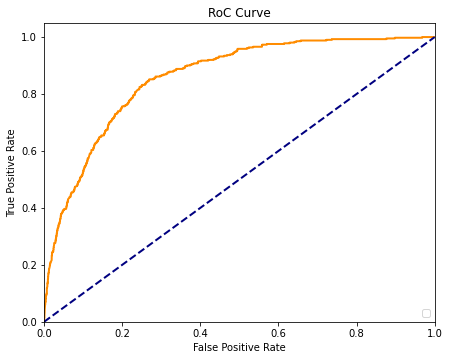

[0 1]
training time: 3.029633045196533s


No handles with labels found to put in legend.


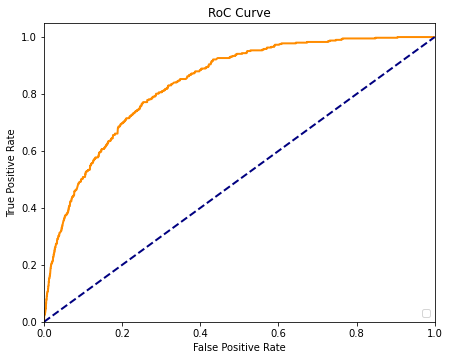

[0 1]
training time: 3.179882764816284s


No handles with labels found to put in legend.


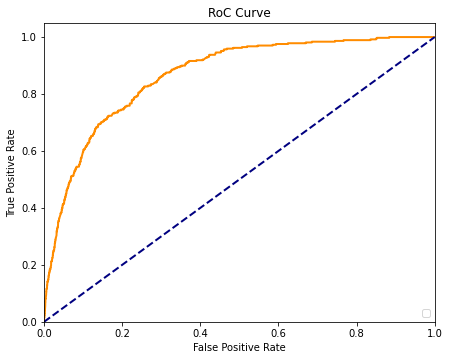

[0 1]
training time: 3.150623321533203s


No handles with labels found to put in legend.


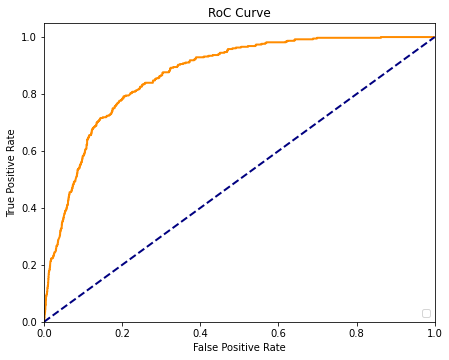

[0 1]
training time: 3.204665184020996s


No handles with labels found to put in legend.


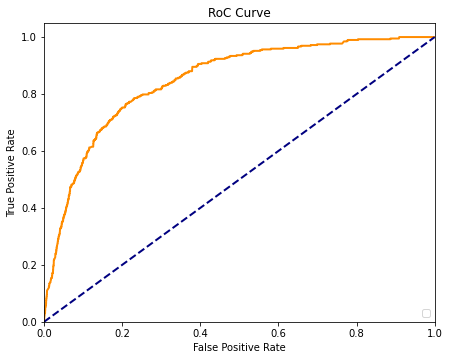

[0 1]
training time: 3.336669921875s


No handles with labels found to put in legend.


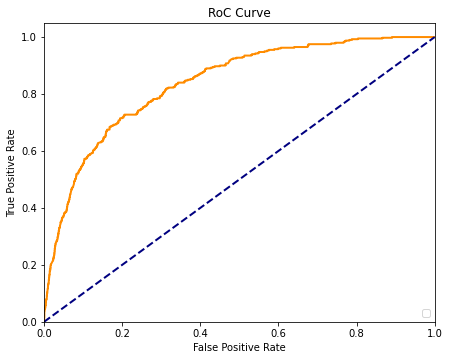

[0 1]
training time: 3.2790424823760986s


No handles with labels found to put in legend.


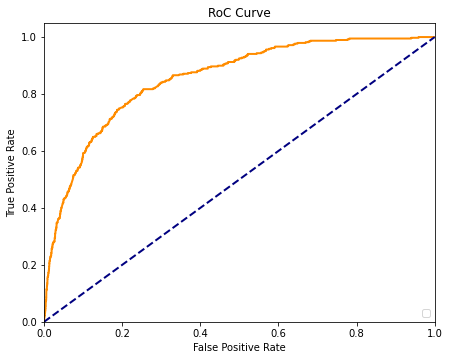

[0 1]
training time: 3.2629997730255127s


No handles with labels found to put in legend.


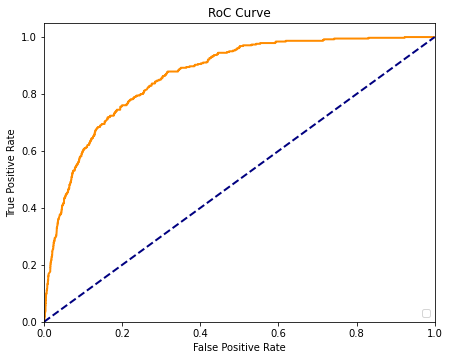

[0 1]
training time: 3.396070957183838s


No handles with labels found to put in legend.


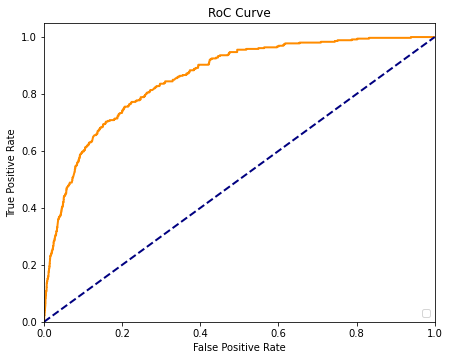

[0 1]
training time: 3.2895092964172363s


No handles with labels found to put in legend.


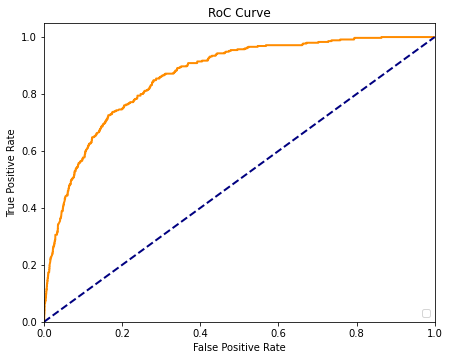

[0 1]
training time: 3.34466814994812s


No handles with labels found to put in legend.


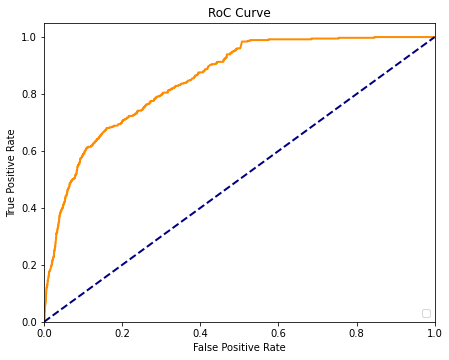

[0 1]
training time: 3.435037851333618s


No handles with labels found to put in legend.


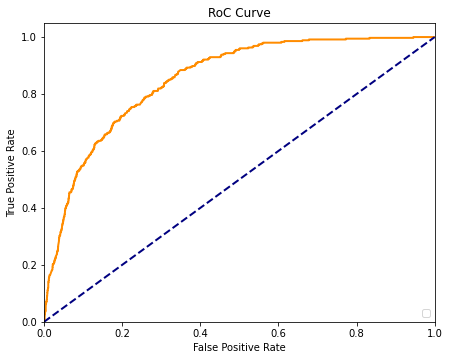

[0 1]
training time: 3.3296236991882324s


No handles with labels found to put in legend.


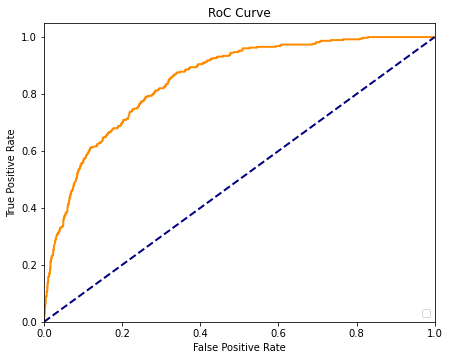

[0 1]
training time: 3.3148415088653564s


No handles with labels found to put in legend.


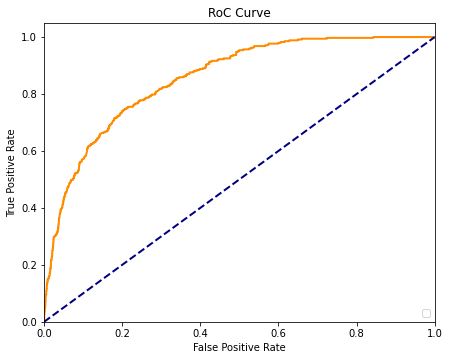

[0 1]
training time: 3.378577947616577s


No handles with labels found to put in legend.


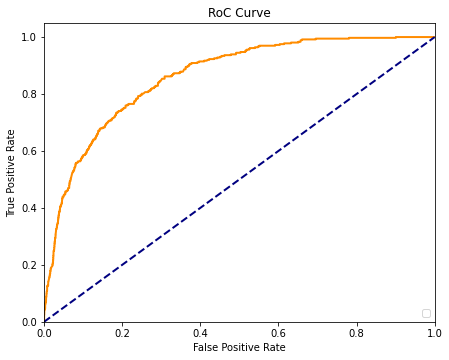

[0 1]
training time: 3.399883270263672s


No handles with labels found to put in legend.


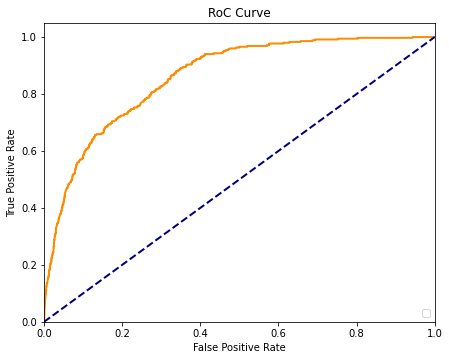

[0 1]
training time: 3.3918185234069824s


No handles with labels found to put in legend.


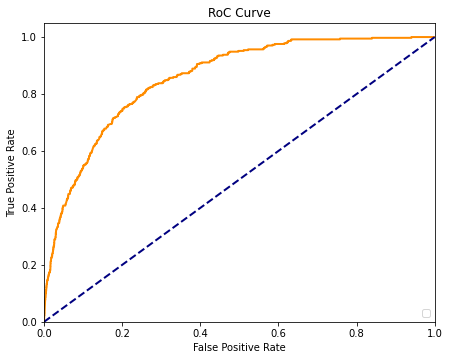

[0 1]
training time: 3.3398849964141846s


No handles with labels found to put in legend.


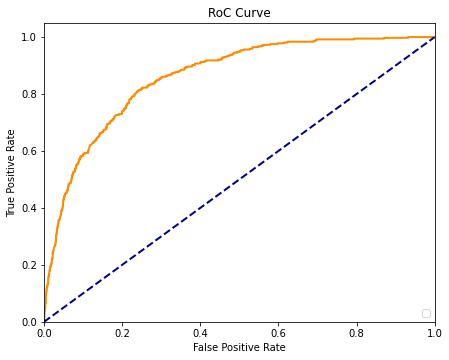

[0 1]
training time: 3.3919544219970703s


No handles with labels found to put in legend.


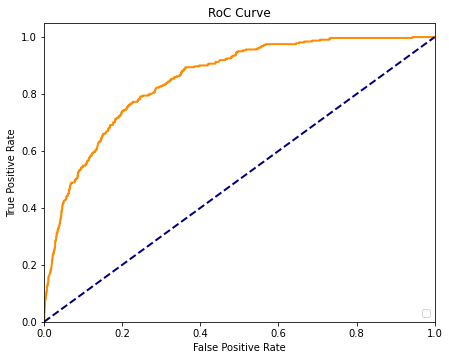

[0 1]
training time: 3.501652240753174s


No handles with labels found to put in legend.


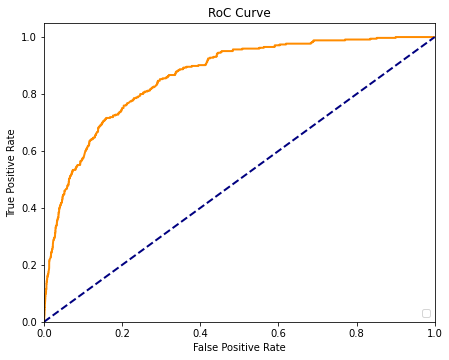

[0 1]
training time: 3.4903159141540527s


No handles with labels found to put in legend.


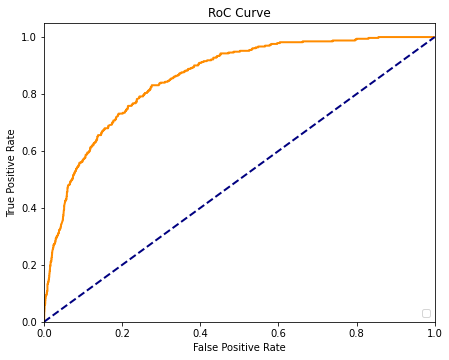

[0 1]
training time: 3.2671213150024414s


No handles with labels found to put in legend.


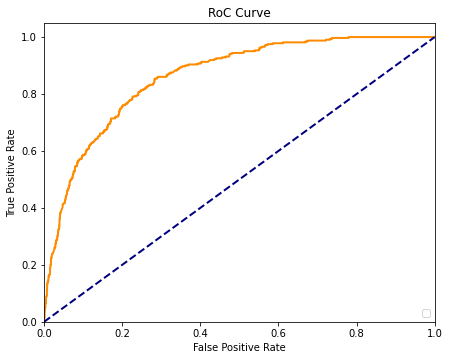

[0 1]
training time: 3.4016597270965576s


No handles with labels found to put in legend.


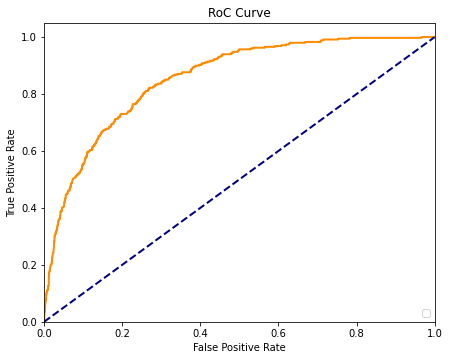

[0 1]
training time: 3.559274911880493s


No handles with labels found to put in legend.


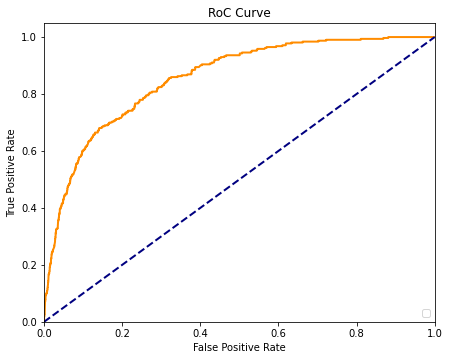

[0 1]
training time: 3.5277867317199707s


No handles with labels found to put in legend.


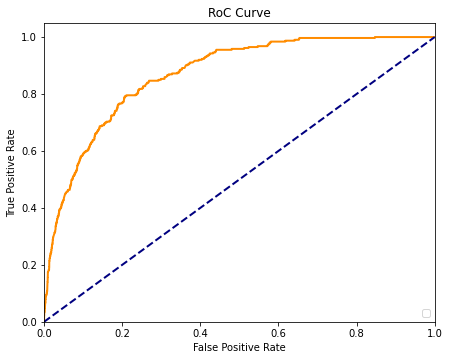

[0 1]
training time: 3.5362300872802734s


No handles with labels found to put in legend.


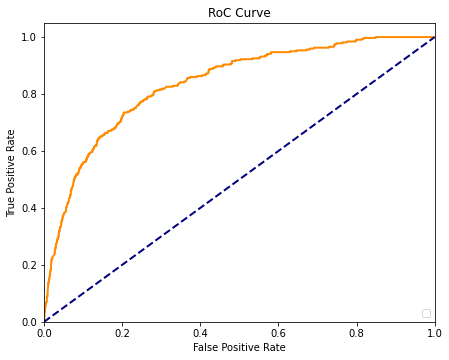

[0 1]
training time: 3.7648539543151855s


No handles with labels found to put in legend.


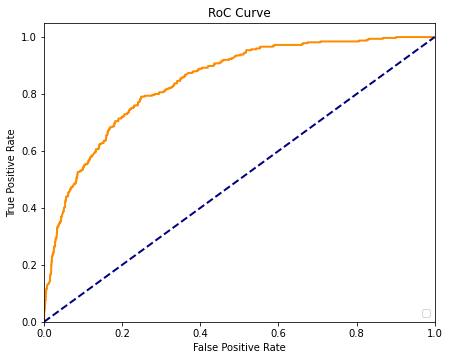

[0 1]
training time: 3.525383710861206s


No handles with labels found to put in legend.


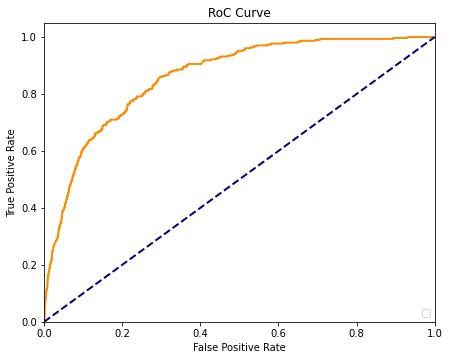

[0 1]
training time: 3.5096704959869385s


No handles with labels found to put in legend.


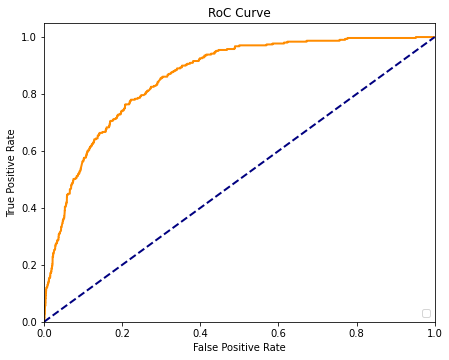

[0 1]
training time: 3.553959846496582s


No handles with labels found to put in legend.


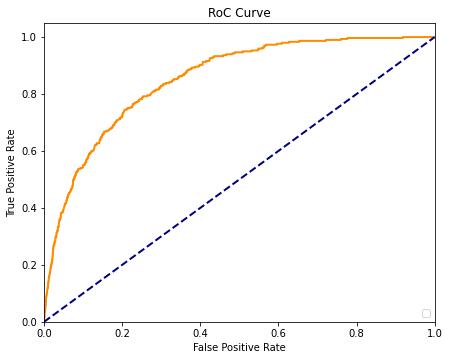

[0 1]
training time: 3.5309150218963623s


No handles with labels found to put in legend.


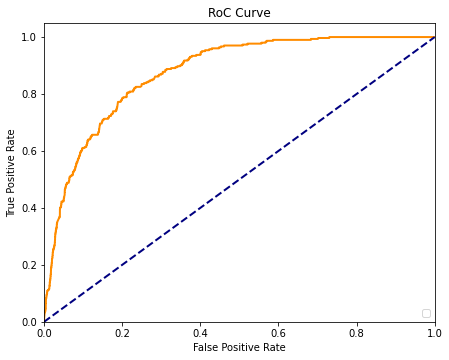

[0 1]
training time: 3.547518014907837s


No handles with labels found to put in legend.


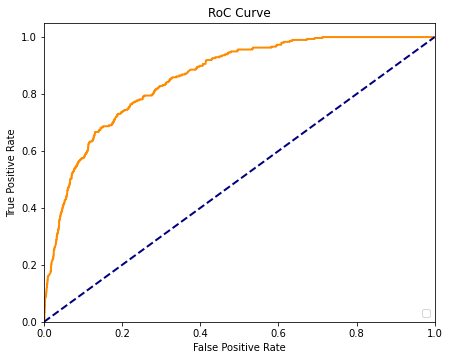

[0 1]
training time: 3.54201602935791s


No handles with labels found to put in legend.


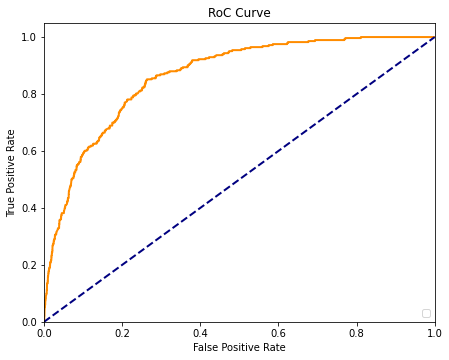

[0 1]
training time: 3.6093380451202393s


No handles with labels found to put in legend.


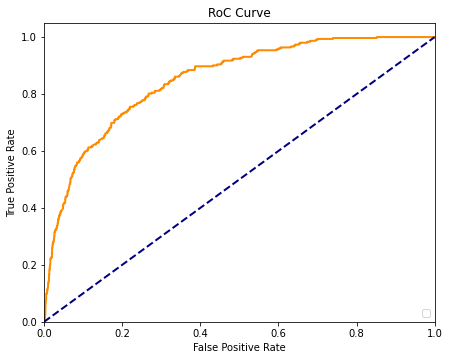

[0 1]
training time: 3.5505216121673584s


No handles with labels found to put in legend.


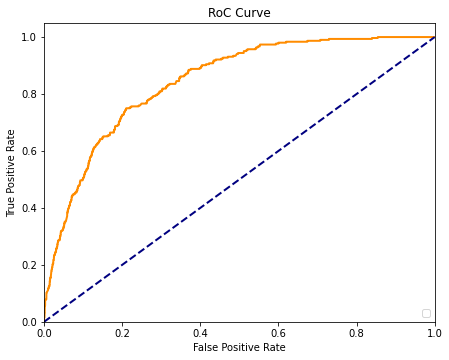

[0 1]
training time: 3.545280694961548s


No handles with labels found to put in legend.


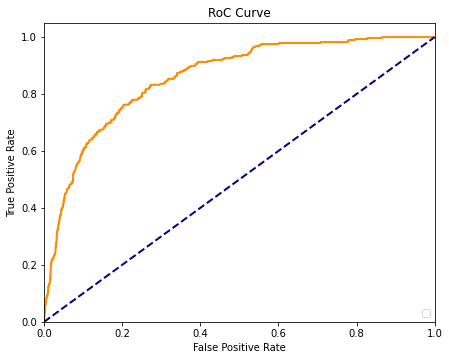

[0 1]
training time: 3.49808669090271s


No handles with labels found to put in legend.


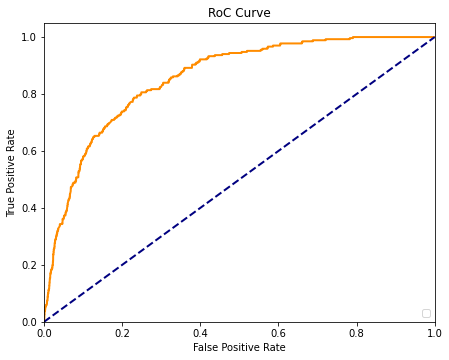

[0 1]
training time: 3.6064870357513428s


No handles with labels found to put in legend.


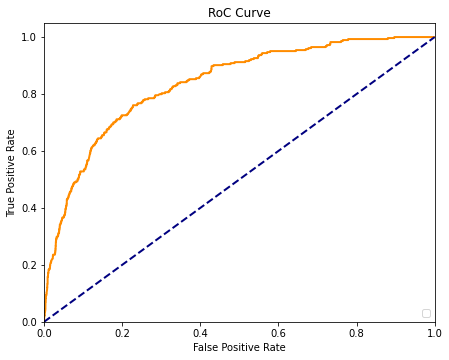

[0 1]
training time: 3.577822208404541s


No handles with labels found to put in legend.


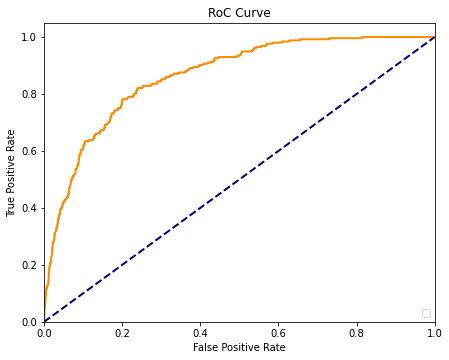

[0 1]
training time: 3.5221822261810303s


No handles with labels found to put in legend.


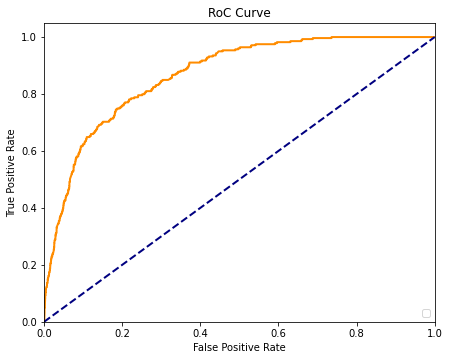

[0 1]
training time: 3.614830493927002s


No handles with labels found to put in legend.


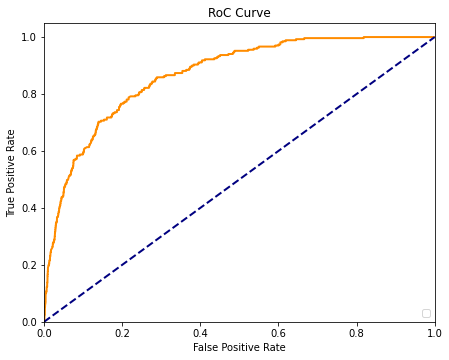

[0 1]
training time: 3.6289188861846924s


No handles with labels found to put in legend.


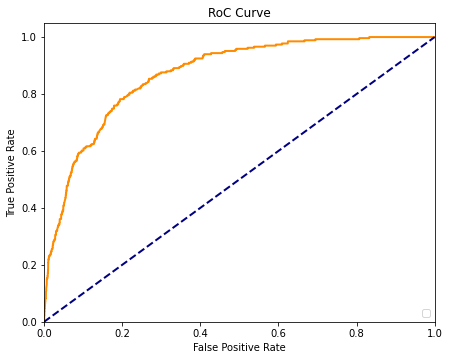

[0 1]
training time: 3.616551160812378s


No handles with labels found to put in legend.


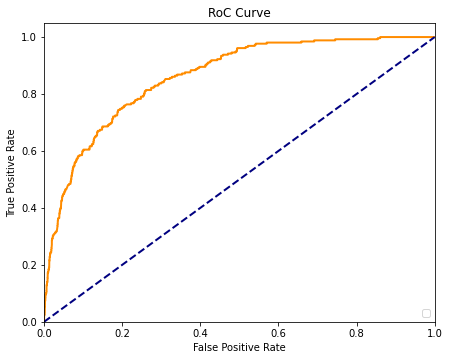

[0 1]
training time: 3.5802767276763916s


No handles with labels found to put in legend.


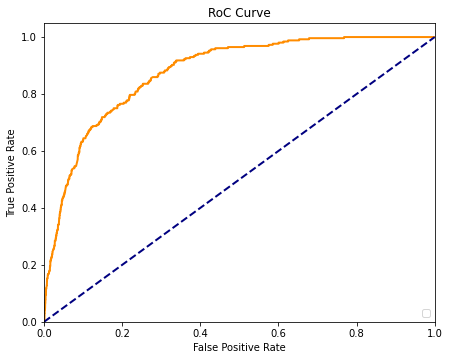

[0 1]
training time: 3.675053596496582s


No handles with labels found to put in legend.


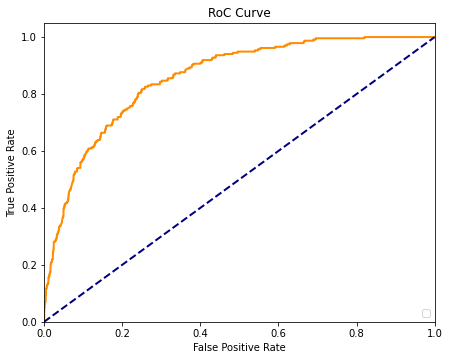

[0 1]
training time: 3.6169447898864746s


No handles with labels found to put in legend.


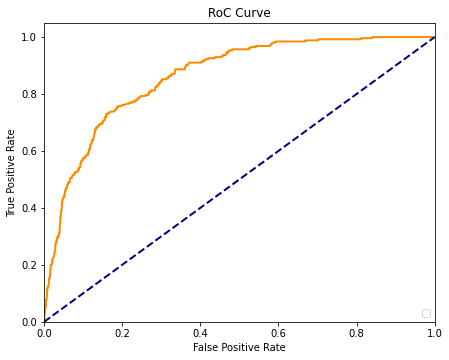

[0 1]
training time: 3.532067060470581s


No handles with labels found to put in legend.


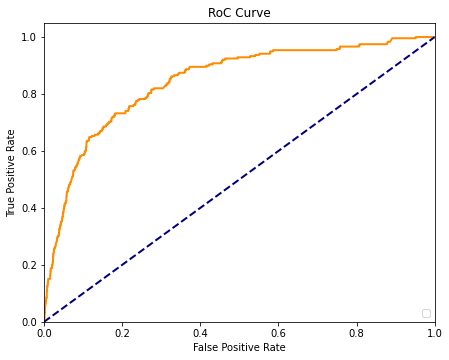

[0 1]
training time: 3.8625056743621826s


No handles with labels found to put in legend.


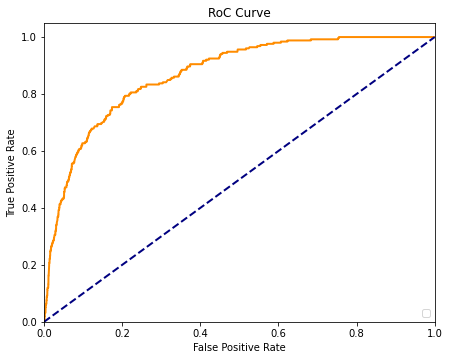

[0 1]
training time: 3.7371695041656494s


No handles with labels found to put in legend.


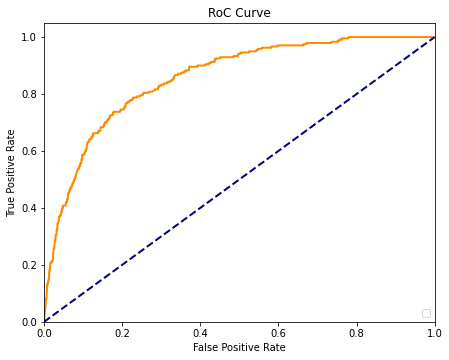

[0 1]
training time: 3.7662105560302734s


No handles with labels found to put in legend.


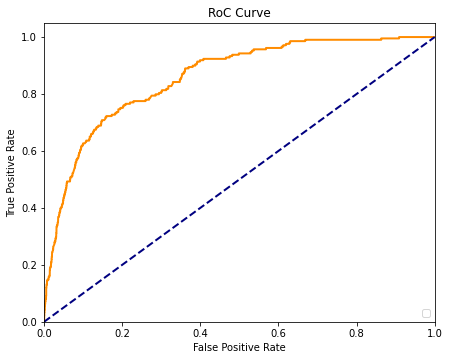

[0 1]
training time: 3.7598705291748047s


No handles with labels found to put in legend.


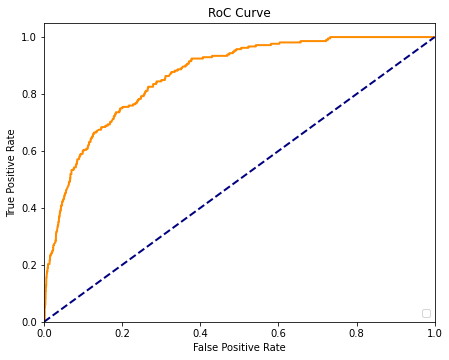

[0 1]
training time: 3.744473934173584s


No handles with labels found to put in legend.


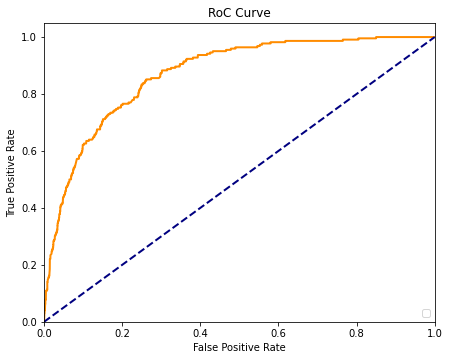

[0 1]
training time: 3.7117626667022705s


No handles with labels found to put in legend.


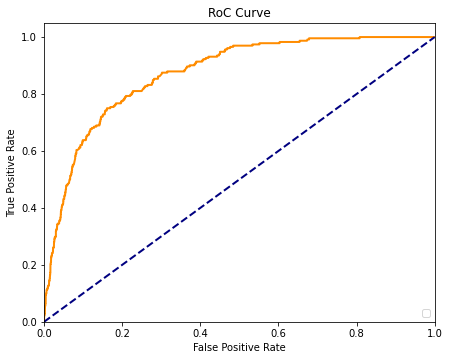

[0 1]
training time: 3.751033067703247s


No handles with labels found to put in legend.


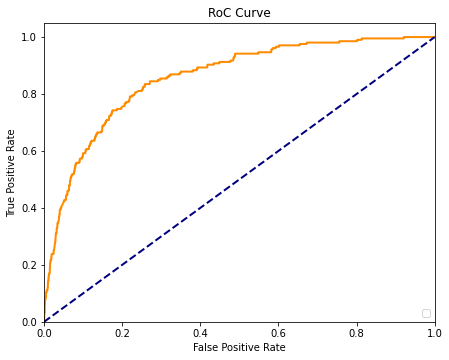

[0 1]
training time: 3.8053932189941406s


No handles with labels found to put in legend.


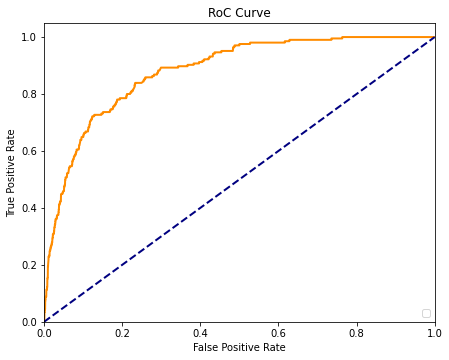

[0 1]
training time: 3.683776378631592s


No handles with labels found to put in legend.


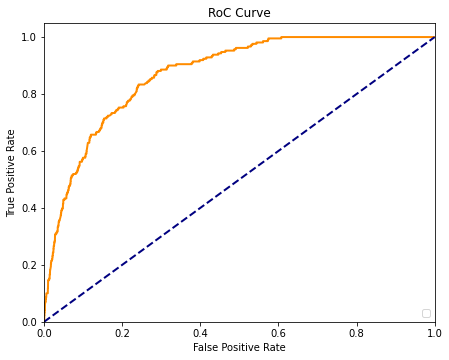

[0 1]
training time: 3.819037675857544s


No handles with labels found to put in legend.


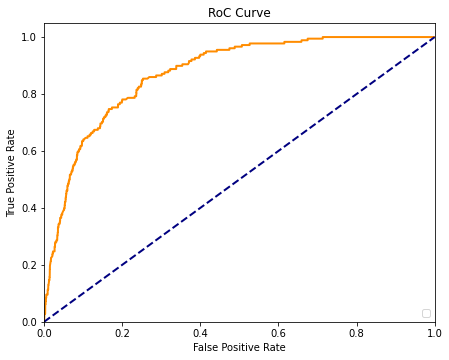

[0 1]
training time: 3.766826868057251s


No handles with labels found to put in legend.


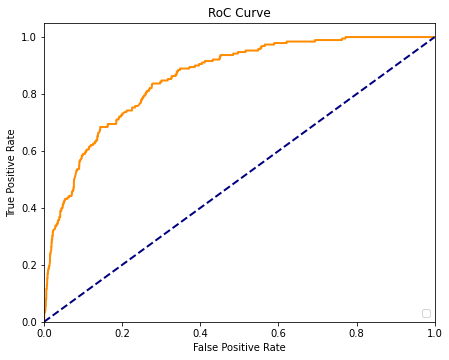

[0 1]
training time: 3.8289544582366943s


No handles with labels found to put in legend.


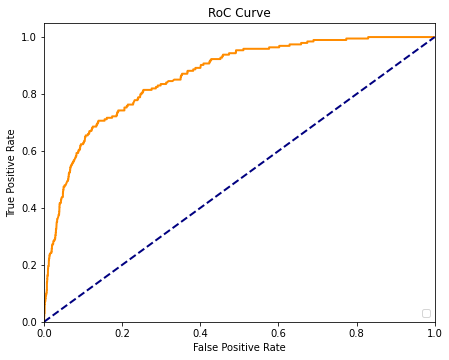

[0 1]
training time: 3.8005731105804443s


No handles with labels found to put in legend.


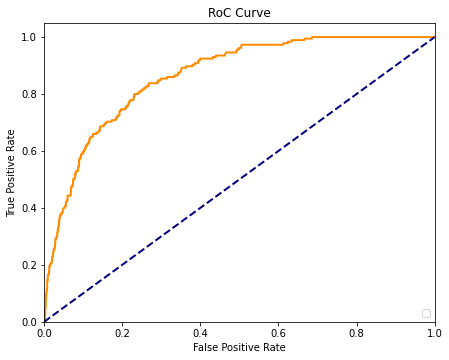

[0 1]
training time: 3.7169437408447266s


No handles with labels found to put in legend.


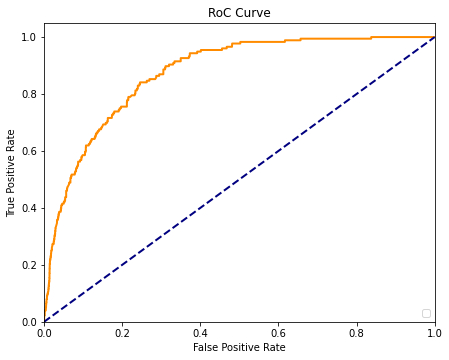

[0 1]
training time: 3.7741916179656982s


No handles with labels found to put in legend.


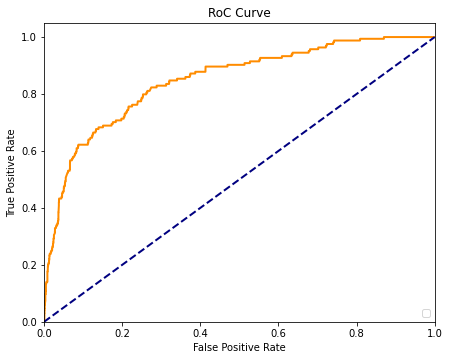

[0 1]
training time: 3.7325046062469482s


No handles with labels found to put in legend.


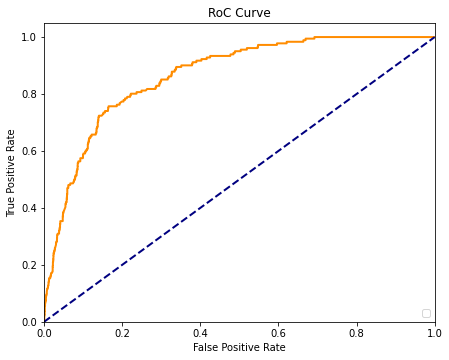

[0 1]
training time: 3.8911616802215576s


No handles with labels found to put in legend.


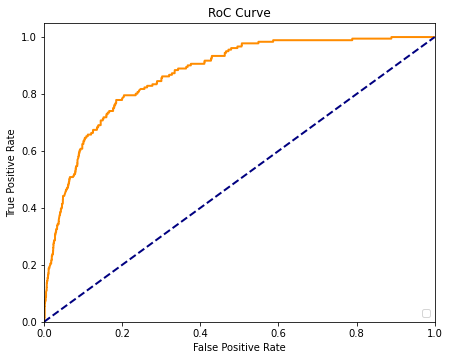

[0 1]
training time: 3.8902862071990967s


No handles with labels found to put in legend.


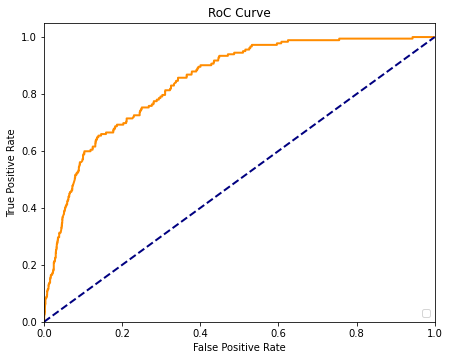

[0 1]
training time: 3.8331398963928223s


No handles with labels found to put in legend.


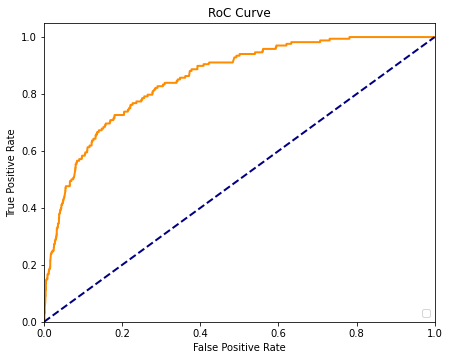

[0 1]
training time: 3.768937587738037s


No handles with labels found to put in legend.


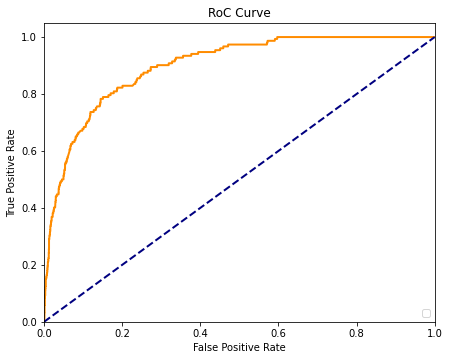

[0 1]
training time: 3.7780351638793945s


No handles with labels found to put in legend.


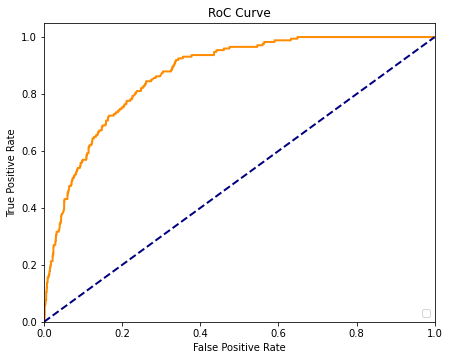

[0 1]
training time: 3.7725865840911865s


No handles with labels found to put in legend.


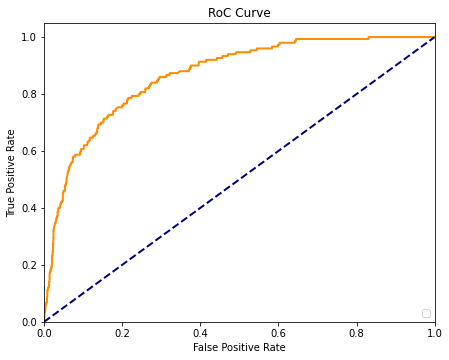

[0 1]
training time: 3.7781269550323486s


No handles with labels found to put in legend.


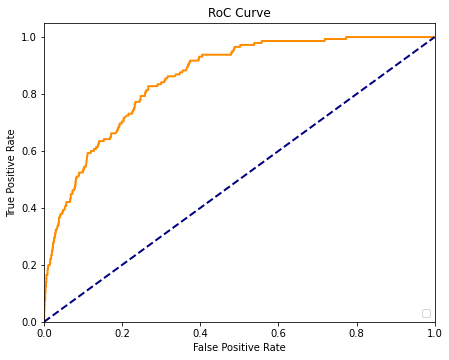

[0 1]
training time: 3.8684146404266357s


No handles with labels found to put in legend.


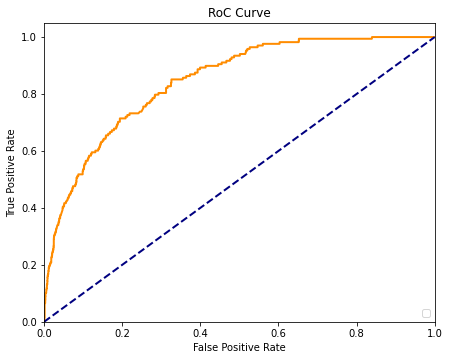

[0 1]
training time: 3.8198182582855225s


No handles with labels found to put in legend.


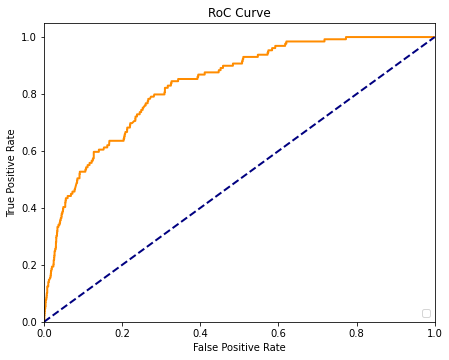

[0 1]
training time: 3.9639360904693604s


No handles with labels found to put in legend.


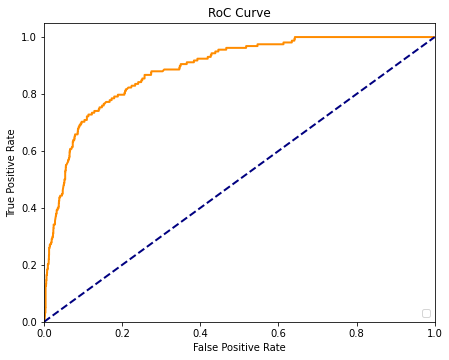

[0 1]
training time: 3.717515707015991s


No handles with labels found to put in legend.


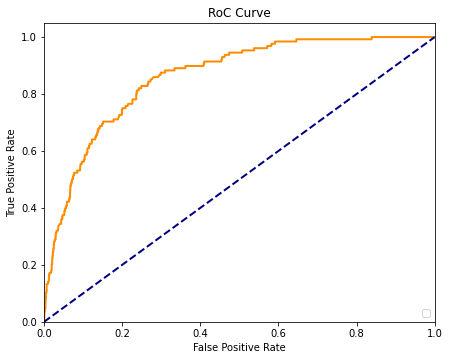

[0 1]
training time: 3.7313127517700195s


No handles with labels found to put in legend.


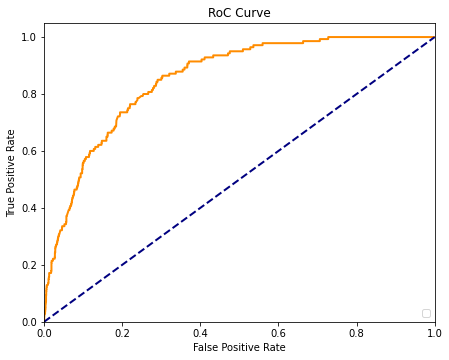

[0 1]
training time: 3.8591434955596924s


No handles with labels found to put in legend.


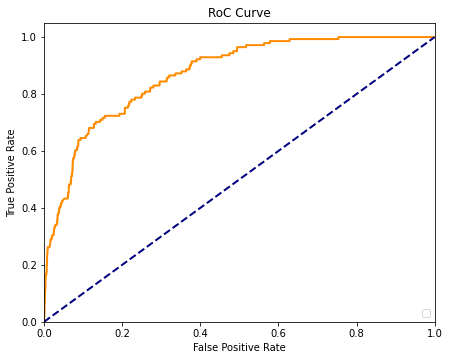

[0 1]
training time: 3.8751800060272217s


No handles with labels found to put in legend.


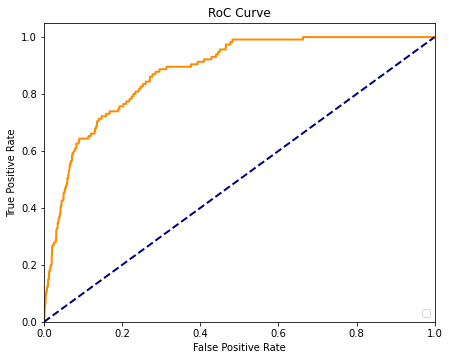

[0 1]
training time: 3.914963722229004s


No handles with labels found to put in legend.


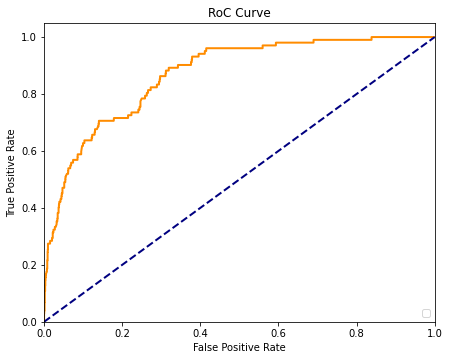

[0 1]
training time: 3.926037073135376s


No handles with labels found to put in legend.


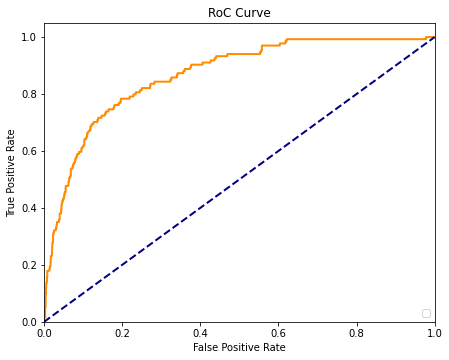

[0 1]
training time: 3.833869218826294s


No handles with labels found to put in legend.


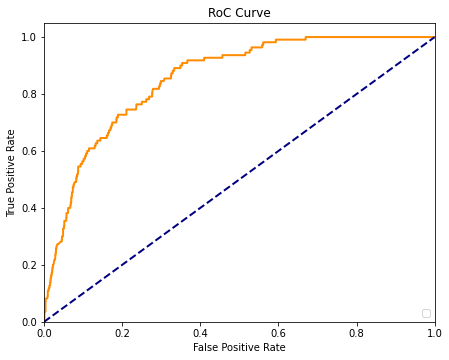

[0 1]
training time: 3.8456218242645264s


No handles with labels found to put in legend.


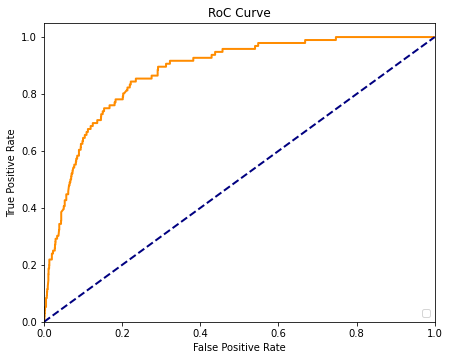

[0 1]
training time: 3.849141836166382s


No handles with labels found to put in legend.


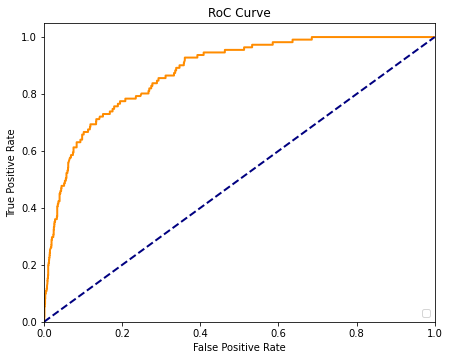

[0 1]
training time: 3.8468177318573s


No handles with labels found to put in legend.


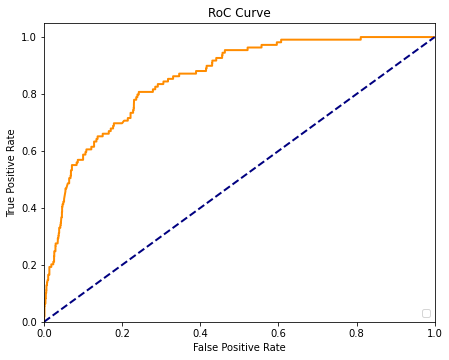

[0 1]
training time: 3.888580799102783s


No handles with labels found to put in legend.


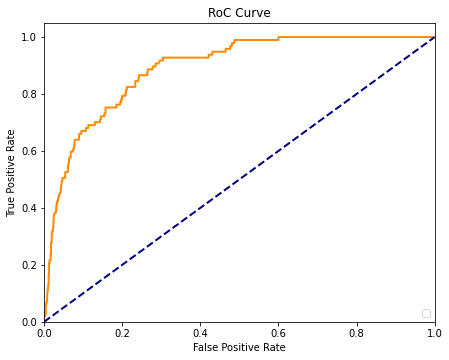

[0 1]
training time: 3.84867525100708s


No handles with labels found to put in legend.


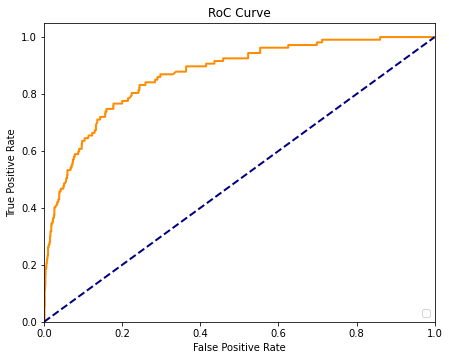

[0 1]
training time: 3.9386942386627197s


No handles with labels found to put in legend.


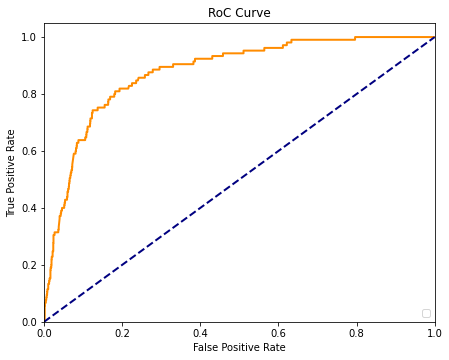

[0 1]
training time: 3.8378326892852783s


No handles with labels found to put in legend.


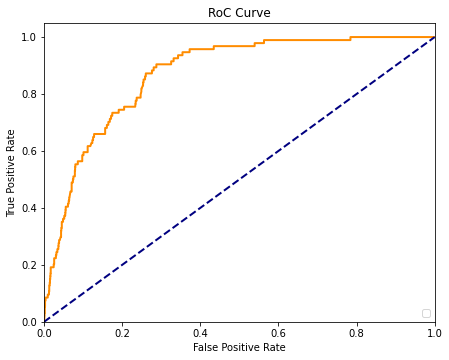

[0 1]
training time: 3.8465490341186523s


No handles with labels found to put in legend.


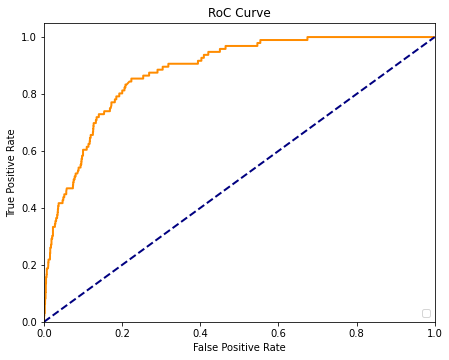

[0 1]
training time: 3.832996368408203s


No handles with labels found to put in legend.


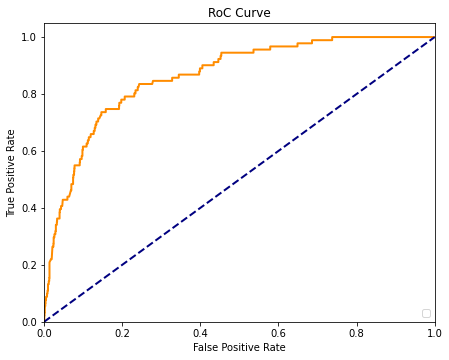

[0 1]
training time: 4.079315185546875s


No handles with labels found to put in legend.


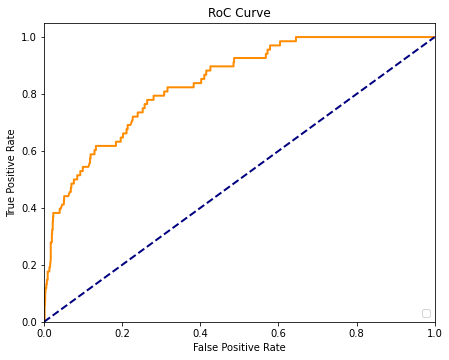

[0 1]
training time: 4.083301782608032s


No handles with labels found to put in legend.


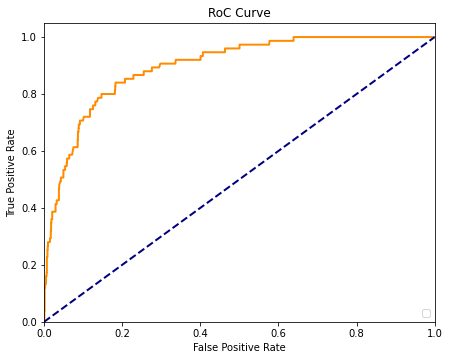

[0 1]
training time: 3.984344244003296s


No handles with labels found to put in legend.


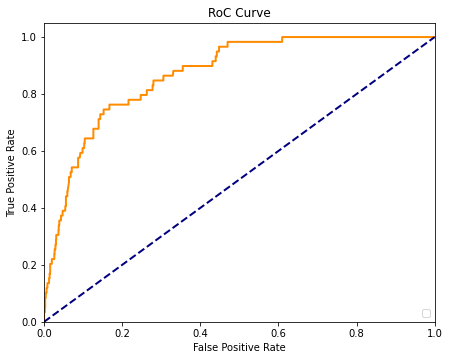

[0 1]
training time: 4.097198724746704s


No handles with labels found to put in legend.


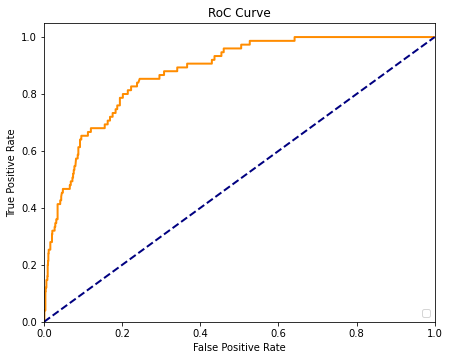

[0 1]
training time: 4.070545673370361s


No handles with labels found to put in legend.


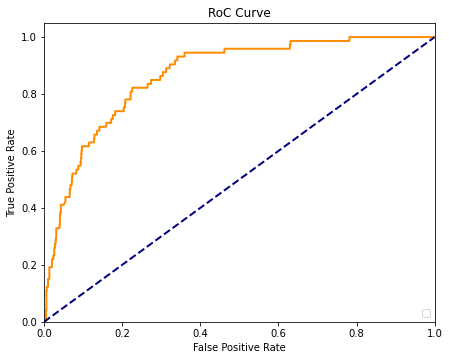

[0 1]
training time: 4.114683389663696s


No handles with labels found to put in legend.


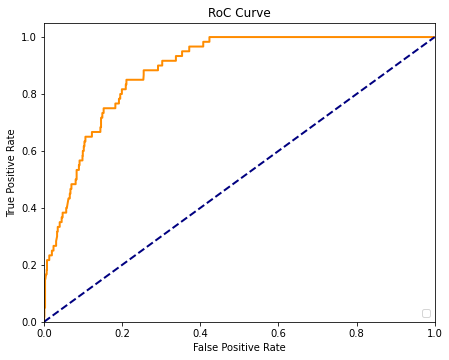

[0 1]
training time: 4.233960151672363s


No handles with labels found to put in legend.


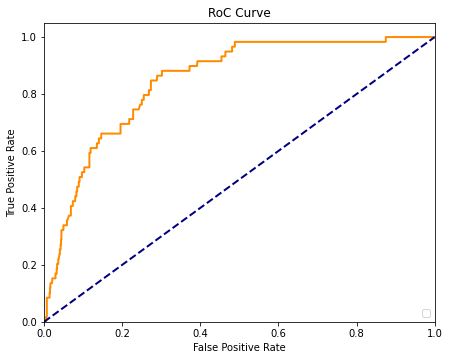

[0 1]
training time: 4.119978666305542s


No handles with labels found to put in legend.


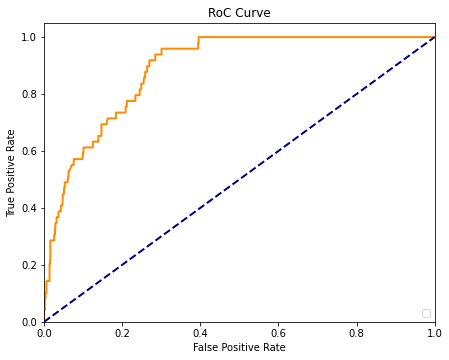

[0 1]
training time: 4.207502841949463s


No handles with labels found to put in legend.


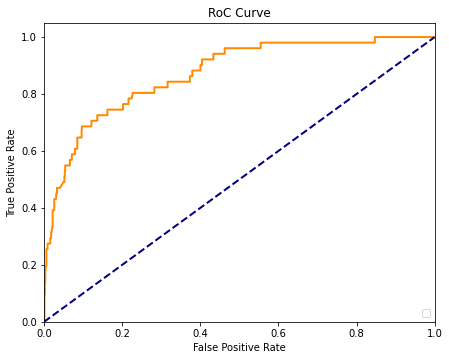

[0 1]
training time: 4.085970878601074s


No handles with labels found to put in legend.


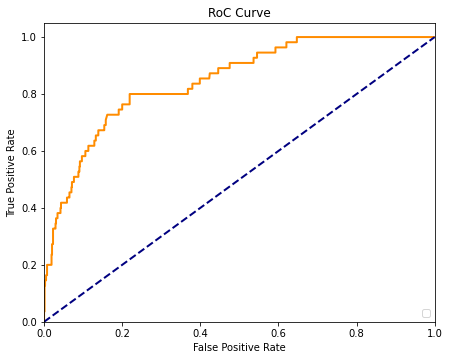

[0 1]
training time: 4.303406238555908s


No handles with labels found to put in legend.


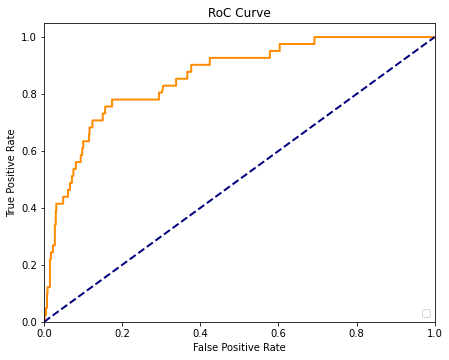

[0 1]
training time: 4.302900075912476s


No handles with labels found to put in legend.


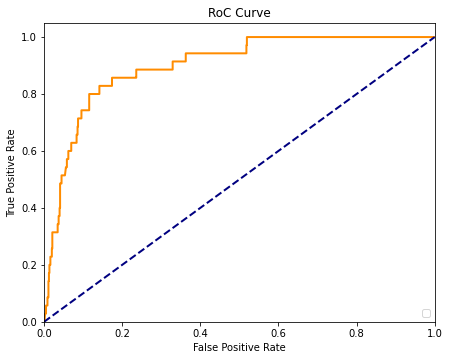

[0 1]
training time: 4.3488688468933105s


No handles with labels found to put in legend.


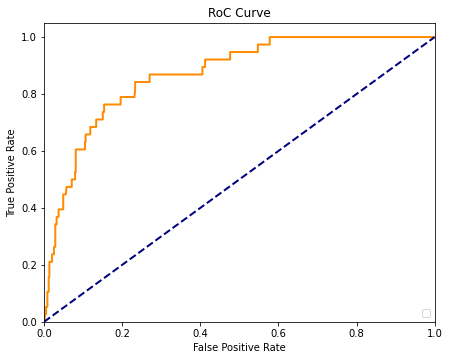

[0 1]
training time: 4.5617852210998535s


No handles with labels found to put in legend.


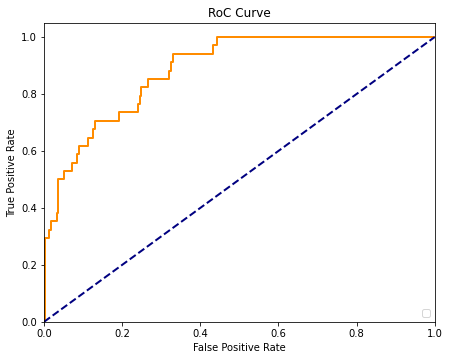

[0 1]
training time: 4.5477294921875s


No handles with labels found to put in legend.


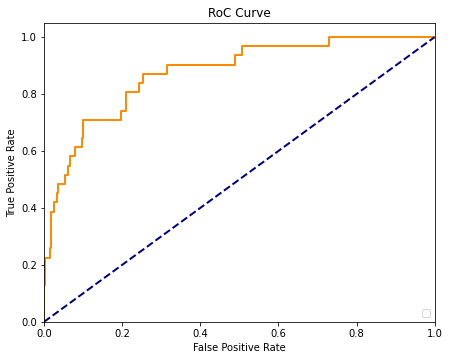

[0 1]
training time: 4.282282829284668s


No handles with labels found to put in legend.


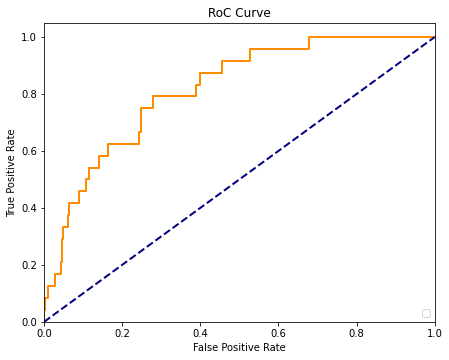

[0 1]
training time: 4.6638031005859375s


No handles with labels found to put in legend.


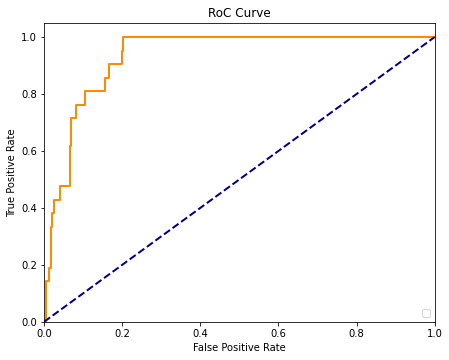

[0 1]
training time: 4.615023851394653s


No handles with labels found to put in legend.


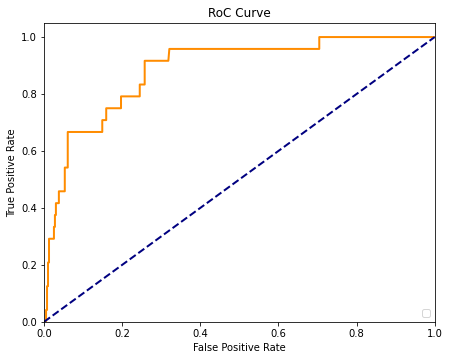

In [12]:
num=0
xax = []
yauc = []
yacc = []
for j in range(1,49):
    num+=1
    auc,acc = solve( int(tot*num/50),train0 )
    xax.append(num/20)
    yauc.append(auc)
    yacc.append(acc)

In [ ]:
plt.plot(xax,yacc)
plt.show()



In [ ]:
plt.plot(xax,yauc)
plt.show()